In [ ]:
!pip install emcee
!pip install corner

     |████████████████████████████████| 51kB 2.7MB/s 


In [ ]:
import numpy as np
import matplotlib.pylab as plt
from numpy import math
from scipy.optimize import curve_fit
import seaborn as sns
from scipy import stats
from scipy.stats import *
import pandas as pd
from scipy.optimize import curve_fit
from scipy.optimize import minimize

import emcee
import seaborn as sns
import corner
import pymc3 as pm

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving figure1_plotdata.csv to figure1_plotdata.csv


In [ ]:
Dat=np.loadtxt('figure1_plotdata.csv',delimiter=',',skiprows=1)
Names=np.array(['Frequency [MHz]', 'Weight', 'a: Tsky [K]', 'b: Tres1 [K]', 'c: Tres2 [K]','d: Tmodel [K]', 'e: T21 [K]'
])

# Validación del modelo físico de la señal de 21 cm reportada por Edges.

En esta archivo se modelan los medelos propuestos por $\text{Edges}$ usnado la estadistica bayesiana, en la cual se unsan datos previos para inferir el comportamiento posterior de nuestros parametros,  

# Implementación del modelo a los datos de .....

Los datos optenidos de https://loco.lab.asu.edu/edges/edges-data-release/, los cuales contienen la siguiente información **Frequency [MHz], Weight, a: Tsky [K], b: Tres1 [K], c: Tres2 [K], d: Tmodel [K], e: T21 [K]**

Donde la frecuencia y el peso son nuestros y a,b,c,d,e son nuestros parametros

**Griaficas**

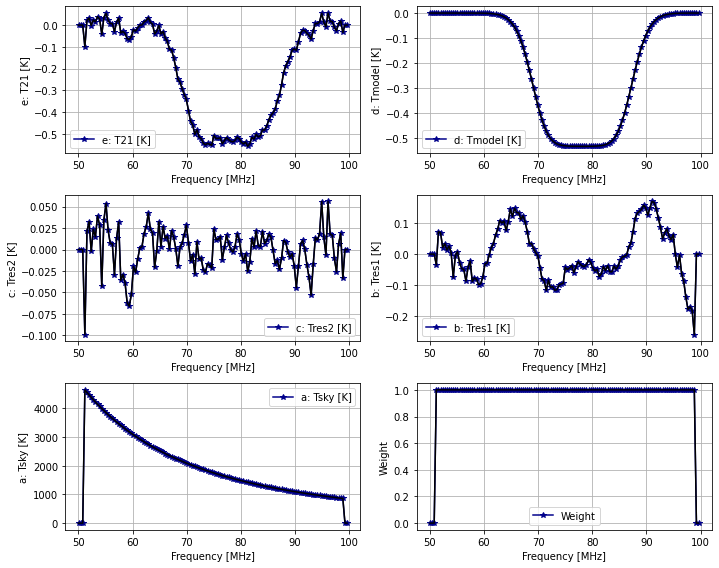

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(10, 8))
for i, ax in enumerate(axes.flat, start=0):
    ax.plot(Dat[:,0],Dat[:,6-i],color='darkblue',marker='*',label=Names[6-i])
    ax.plot(Dat[:,0],Dat[:,6-i],color='k')
    ax.set_xlabel(Names[0] )
    ax.set_ylabel(Names[6-i] )
    ax.grid()
    ax.legend()
fig.tight_layout()

plt.show()

## Modelo

Los datos para nuestro modelo son frecuenciua vs temperatura sky.
 El modelo consiste en obtener $T_{sky}$ como la suma de $T_F$ (-.--------)y $T_{21}$ (Temperatura relacionada a la trancicion de 21 cm) $T_{sky}=T_F(\nu)+T_{21}(\nu)$

$T_F( \nu)$ esta modelada por la siguiente ecuación

$$T_F(\nu)=a_o\left(\frac{\nu}{\nu_c}\right)^{-2.5}+a_1\left(\frac{\nu}{\nu_c}\right)^{-2.5}\log\left(\frac{\nu}{\nu_c}\right)+a_2\left(\frac{\nu}{\nu_c}\right)^{-2.5}\left[\log\left(\frac{\nu}{\nu_c}\right)\right]^2+a_3\left(\frac{\nu}{\nu_c}\right)^{-4.5}+a_4\left(\frac{\nu}{\nu_c}\right)^{-2.0}+$$

donde $T_F ( ν )$ es la temperatura de brillo de la emisión de primer plano, $ν$ es lafrecuencia, $ν_c$ es la frecuencia central de la banda observada y los coeficientes $a_n$ se ajustan a los datos. La función anterior es una aproximación lineal, centrada en $ν_c$ ,
$T_{21}$ tiene la siguiente expresón
$$T_{21}=-A\left[\frac{1-e^{\tau e^B}}{1-e^{-\tau}}\right]$$

Donde
$$B=\frac{4(v-\nu_o)^2}{w^2}\log\left(-{1\over \tau }\log\left({{1+e^{-\tau}}\over 2}\right)\right)$$


# Conjunto de parametros

En el presente texto, no solo ha observar el comportamiento bayesiano del modelo de Bowman, sino que tambien se va a tomar algunas parametros previos de otros conjuntos para ver su conportamiento. los parametros selecionados son lo siguientes

>**Bow**= contiene los datos del articulo de bowman

>**pyemcee**= Contiene parametros similares a los de bowman, obtenidos mediante el ajuste de pemcee

>**pyemcee 2**= conjunto similar al anterior pero realizando un ajuste con parametros uniformes

>**Intento**=Es un conjunto de parametros pervios que se obtuvieron de un ajuste hecho con curvefit de scipy

> **Natu, y Natu_resutl**= Son resultados obtenidos en el articulo de Ref{}, publicados en la revista nature

In [ ]:
# los datos de estas constantes estan el kelvin, al igual que los datos tomados de EDGES

#Bow=1570.0/1000, 700.0/1000,-1100.0/1000,750.0/1000,-175.0/1000,0.567,78.3,20.75,800.0,0.05

Bow= 1570, 700,-1100,750,-175,0.530,78.3,20.75,8.0,0.05             # intersección con el eje y
Pyemcee= -11221.09499241, -14168.57143649, -10203.98895781,    144.62969775,12659.42909717,500.0/1000,78.3,19.0,7.0,0.05   #ajuste coeficientes de minimos cuadrados
Pyemcee2=  1743.9711358801117, 147.55004539601418, -685.8034915470453,  36.53665860684164,-196.18414188062908, 0.524285560037914, 78.6235695471557, 21.162879332114997,7.6124372729808196,0.05
Intento= -14285.22801433, -17568.34439754, -12412.45765732,    167.33842652, 15700.28024181, 0.51948421412718, 78.51820480335225, 19.32741526388625, 7.001176416303,0.05
Natu_result= -10111.419 ,-5673.739 ,-1831.621 ,150.673 ,11711.500 ,0.553, 6.78 ,78.31 ,18.74,0.05
Natu= 2000, -720,1000,-720,175,1.12,78.3,19.5,2.8,0.05
Col=['b','r','darkorange','darkmagenta','gold','g','khaki','r','indigo','teal']
Cons=np.array([Bow,Pyemcee,Pyemcee2,Intento,Natu_result,Natu])
Cons_names=np.array(['Bow','Pyemcee','Pyemcee2','Natu_result','Intento','Natu'])

In [ ]:

Tabla = """\
+-------------------------------------------------------------------------------------------------+
|Bow               Pyemcee        Pyemcee2         Intento        Natu_result     Natu            |
|-------------------------------------------------------------------------------------------------|
{}
+-------------------------------------------------------------------------------------------------+\
"""
Tabla = (Tabla.format('\n'.join("| {:<15} {:<15} {:<15} {:<15}{:<15} {:<15}  |".format(*fila)
 for fila in np.round(np.transpose(Cons),3))))
print (Tabla)

+-------------------------------------------------------------------------------------------------+
|Bow               Pyemcee        Pyemcee2         Intento        Natu_result     Natu            |
|-------------------------------------------------------------------------------------------------|
| 1570.0          -11221.095      1743.971        -14285.228     -10111.419      2000.0           |
| 700.0           -14168.571      147.55          -17568.344     -5673.739       -720.0           |
| -1100.0         -10203.989      -685.803        -12412.458     -1831.621       1000.0           |
| 750.0           144.63          36.537          167.338        150.673         -720.0           |
| -175.0          12659.429       -196.184        15700.28       11711.5         175.0            |
| 0.53            0.5             0.524           0.519          0.553           1.12             |
| 78.3            78.3            78.624          78.518         6.78            78.3             |


In [ ]:
"""
Funciones de la temperatura
Sky
"""
##################################0-
def T_f(v,a0,a1,a2,a3,a4):
  vc=np.median(v) #Frecuancia central
  vc=78.0 # frecuancia central (EDGES)
  return a0*(v/vc)**-2.5+a1*(v/vc)**-2.5*np.log10(v/vc)+a3*(v/vc)**-4.5+a4*(v/vc)**-2.0+a2*(v/vc)**-2.5*np.log10(v/vc)**2
def T_21(v,A,v0,w,tau):
  B=((4*(v-v0)**2)/(w**2))*(np.log10((-1/tau)*np.log10((1+(np.e**(-tau)))/2)))
  return-A*(1-(np.e**(-tau*(np.e)**(B))))/(1-(np.e**(-tau)))

def T_sky(v,a0,a1,a2,a3,a4,A,v0,w,tau):
  T21= T_21(v,A,v0,w,tau)
  Tf= T_f(v,a0,a1,a2,a3,a4)
  return T21+Tf


#El primer modelo que vamos a trabajar, tiene una funcion prior donde los parametros son distribuiciones unuformes, y una dispersioón $\sigma=0.5$ constantes.

Como en el articulo de Boeman, no se da un valor especifico del error en los datos, se va a tomar inicialmente un valor de la disperción de $\sigma= 0.5$ , observar si este influye en el resultado final de los datos, para ver si en necesario incluirlo como parametro dentro de nuestros modelos  

In [ ]:
def T_modelo(x,y,yerr,const):
  a0,a1,a2,a3,a4,A,v0,w,tau,sigma= const             # intersección con el eje y
  nll=lambda *args: -log_likelihood(*args) # Construccion de la funcion lamda
  v=x
  N=len(x)
  vc=78.0
  #Condiciones iniciales
  yerr=0.05
  In=np.array([a0,a1,a2,a3,a4,A,v0,w,tau]) + 0.1 * np.random.randn(9)
  #Solución
  Sol=minimize(nll,In,args=(x, y, yerr))
  # Extrayendo los valores de los parametros arojados por MlE
  popt = Sol.x
  a0_,a1_,a2_,a3_,a4_,A1,v01,w1,tau1=popt

  return popt
"""
def nwlakers(x,y,yerr,Sol,N,walkers,steps):
  pos = Sol+ 50e-1 * np.random.randn(walkers, N)  # posterior ,randn genera 9 arreglos de 1500 n umeros aleatorios
  nwalkers, ndim = pos.shape # 2500 caminos, 9 parametros

  sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, yerr))
  sampler.run_mcmc(pos, steps, progress=True);

  params=sampler.get_chain(discard=N, thin=1000, flat=True)#parametros

  #Time_autocorr(sampler,i,Ncons,steps)
  return params
"""
def nwlakers(x,y,yerr,Sol,N,walkers,steps,i):
  pos = Sol+ 10e-1 * np.random.randn(walkers, N)  # posterior ,randn genera 9 arreglos de 1500 n umeros aleatorios
  nwalkers, ndim = pos.shape # 2500 caminos, 9 parametros

  sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, yerr,i))
  sampler.run_mcmc(pos, steps, progress=True);

  params=sampler.get_chain(discard=N, thin=1000, flat=True)#parametros

  #Time_autocorr(sampler,i,Ncons,steps)
  return params

def log_likelihood(theta,x,y,sigma):
  v=x
  a0,a1,a2,a3,a4,A,v0,w,tau = theta
  sn2=sigma**2 #+T_sky(v,a0,a1,a2,a3,a4,A,v0,w,tau)**2
  return -0.5*sum((y-T_sky(v,a0,a1,a2,a3,a4,A,v0,w,tau))**2/sn2 + np.log(2*np.pi*sn2))
def log_probability(theta, x, y, yerr,i):
    lp = log_p(theta,i,Cons_names)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood1(theta, x, y, yerr)
def log_p (theta,i,Cons_names):
  a0,a1,a2,a3,a4,A,v0,w,tau = theta
  a0=np.round(a0,3)

  if Cons_names[i]== 'Bow':
    if 1500.0 < a0 < 1650.0 and 400.0 < a1 < 900.0 and  -1600.0< a2 <-600.0 and 450.0 <a3 < 950.0 and -225.0 < a4 < -100.0 and 0.370 < A <0.670 and  77.8< v0 <78.8 and 19.5 <w < 22.0 and 4.5 <tau< 13.0: # and 0.04 <sigma< 0.06:
    #if 1.400 < a0 < 1.650 and 0.400 < a1 < 0.900 and  -0.1600< a2 <-0.600 and 0.450 <a3 < 0.950 and -0.225 < a4 < -0.100 and 0.370< A < 0.670 and 77.4  < v0 < 78.5 and 17.0  < w < 22.8 and 6.0<tau<7.8 and 0.0 <sigma< 0.6:
      return 0.0
  if Cons_names[i]=='Pyemcee':
    if -18000.0 < a0 < -10000.0 and -1800.0 < a1 < -16000.0 and  -1000.0< a2 <-7500.0 and 100.0 <a3 < 150.0 and 800.0 < a4 < 16000.0 and 0.09 < A < 1.30 and  77.8< v0 <78.8 and 17.5 <w < 22.0 and 2.5 <tau< 14.8 :
      return 0.0
  if Cons_names[i]=='Pyemcee2':
    if 1400 < a0 < 1650 and 400.0 < a1 < 900.0 and  -1600< a2 <-600 and 450.0 <a3 < 950.0 and -225.0 < a4 < -100.0 and 370.0< A < 670.0 and 77.4  < v0 < 78.5 and 17.0  < w < 22.8 and 6.0<tau<7.8:# and 0.0 <sigma< 0.6:
      return 0.0
  if Cons_names[i]=='Natu_result':
    if -2000 < a0 < 2000.0 and -2000.0 < a1 < 2000.0 and  -2000.0< a2 <2000.0 and -2000.0 <a3 < 2000.0 and -2000 < a4 < 2000.0 and 0.90 < A < 1.30 and  77.8< v0 <78.8 and 19.5 <w < 22.0 and 2.5 <tau< 4.8 : #intervalos expandidos
      print('ok')
      return 0.0
  if Cons_names[i]=='Intento':
    if -20000 < a0 < 20000.0 and -20000.0 < a1 < 20000.0 and  -20000.0< a2 <20000.0 and -20000.0 <a3 < 20000.0 and -20000 < a4 < 20000.0 and 0.0 < A < 1.30 and  77.8< v0 <78.8 and 17.5 <w < 22.0 and 2.5 <tau< 14.8 : #intervalos expandidos
        print('ok')
        return 0.0
  if  Cons_names[i]=='Natu':
    if 1980.0 < a0 < 2030.0 and -800.0 < a1 < -200.0 and  -200.0< a2 <1060.0 and -800.0 <a3 < 1800.0 and 150.0 < a4 < 210.0 and 0.0 < A < 1.30 and  77.8< v0 <78.8 and 17.5 <w < 22.0 and 2.0 <tau< 14.8 :  #O Artículo
      return 0.0
  return -np.inf

Como se puede observar en la función $\log\_p$ existen diferentes valores de los parámetros previos para cada conjunto, ya que esto ayuda a observar que tanto se puede variar el rango en el que esta definido el parámetro y que tanto este influye en el resultado de la posterior. Los parámetros con un valor mas extendido son los que no se conoce un valor de $3 \sigma $ para acotarlos, las demás cotas son tomadas de las diferentes bibliografías.

In [ ]:
x,y=Dat[:,0][Dat[:,2]>0],Dat[:,2][Dat[:,2]>0] # Variables

## Datos
Como en el texto de bowman, solo toman los datos, para el rango de frecuancias entre $50 \text{ MHz}$ y $90 \text{ MHz}$, y con el fin de ser reproducir los resultados de **Edges** lo mejor posible, vamos a recortar los datos respetando el rango que se uso originalmente, pero a la hora de hacer el analisis de validación se van a usar los datos completos.

#Funcion de maxima probabilidad

**T model** representa la función de máxima probabilidad, para los datos recortados $x\_C$, y $y\_C$, y se visualiza el ajuste de $\text{Tsky}$ y la respectiva gráfica de $21$ Cm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11:

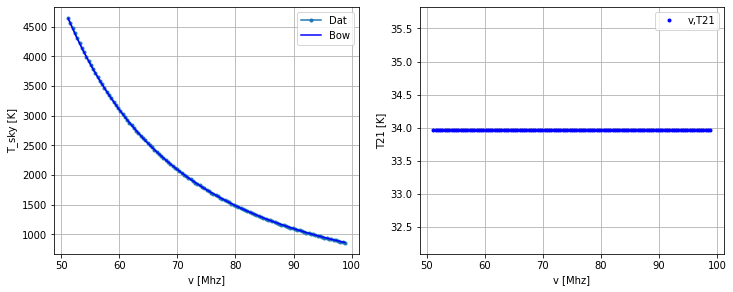

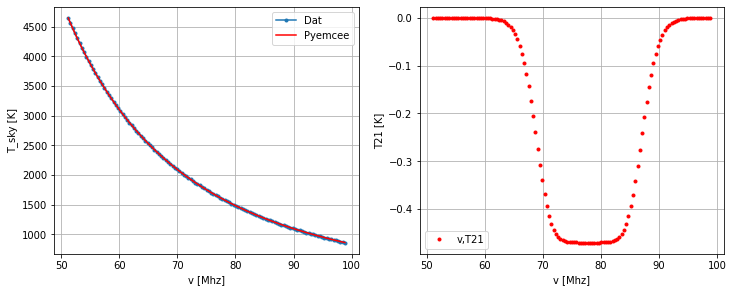

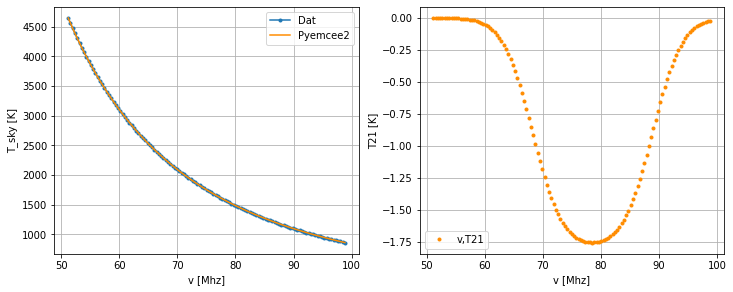

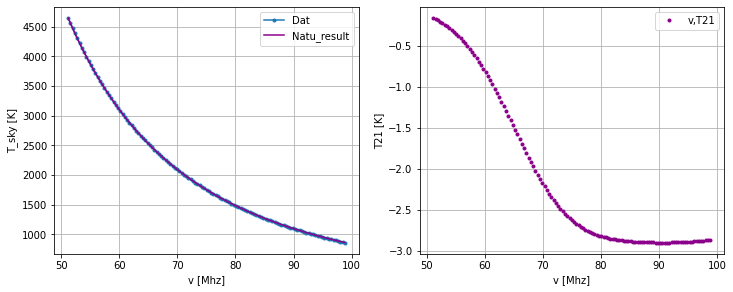

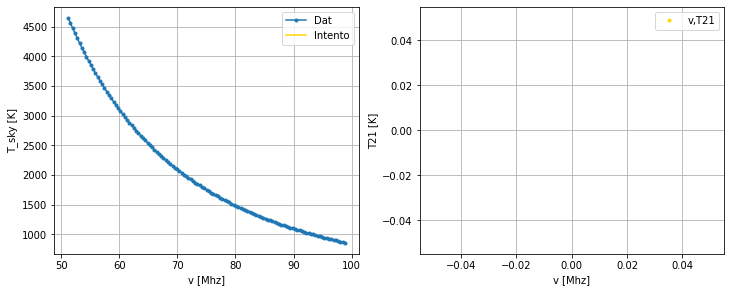

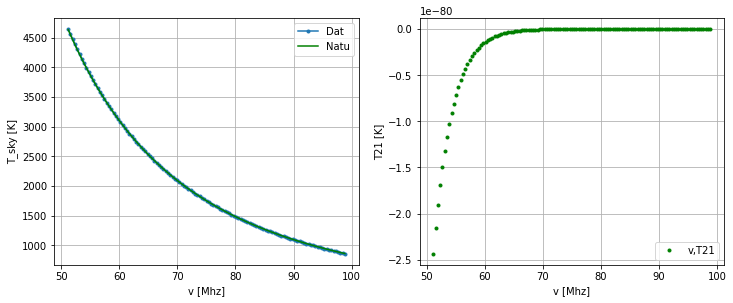

In [ ]:
x_C,y_C=Dat[:,0][Dat[:,0]>60.0] ,Dat[:,2][Dat[:,0]>60.0] # Variables
x_C,y_C=x_C[x_C<94.0],y_C[x_C<94.0]

Constante=np.zeros((6,9))
yerr=0.5

for i in range(len(Cons)):
  Cons_cort=Cons[i]
  Constante[i]=T_modelo(x_C,y_C,yerr,Cons[i])
  a0_,a1_,a2_,a3_,a4_,A1,v01,w1,tau1=Constante[i]
  plt.figure(figsize=(12,10))
  plt.subplot(2,2,1)
  plt.plot(x,y,marker='.',label='Dat')
  plt.plot(x,T_sky(x,a0_,a1_,a2_,a3_,a4_,A1,v01,w1,tau1),color=Col[i],label=Cons_names[i])
  plt.xlabel('v [Mhz]')
  plt.ylabel('T_sky [K]')
  plt.legend()
  plt.grid()
  plt.legend()
  plt.subplot(2,2,2)
  plt.plot(x,T_21(x,A1,v01,w1,tau1),'k.',label='v,T21',color=Col[i])
  plt.xlabel('v [Mhz]')
  plt.ylabel('T21 [K]')
  plt.legend()
  plt.grid()
  plt.legend()


In [ ]:

Tabla = """\
+-------------------------------------------------------------------------------------------------+
|Bow               Pyemcee        Pyemcee2         Intento        Natu_result     Natu            |
|-------------------------------------------------------------------------------------------------|
{}
+-------------------------------------------------------------------------------------------------+\
"""
Tabla = (Tabla.format('\n'.join("| {:<15} {:<15} {:<15} {:<15}{:<15} {:<15}  |".format(*fila)
 for fila in np.round(np.transpose(Constante),3))))
print (Tabla)

+-------------------------------------------------------------------------------------------------+
|Bow               Pyemcee        Pyemcee2         Intento        Natu_result     Natu            |
|-------------------------------------------------------------------------------------------------|
| 2755.889        -11221.041      1744.094        -14292.059     4626181.449     1783.383         |
| 770.799         -14168.61       145.595         -17573.066     -1248298.871    -413.376         |
| 339.552         -10204.292      -684.638        -12354.824     -1156446.903    629.233          |
| -28.046         144.715         36.882          164.357        -2487512.0      -66.56           |
| -1179.491       12659.145       -196.872        15712.778      2121672.897     -134.516         |
| -33.961         0.47            1.755           2.901          2364256.355     240.158          |
| 148.581         77.954          78.567          90.727         8956216.898     -79.878          |


#NWalkers

Esta fucnción construye unas muestras las cuales contiene $2500$ caminantes, los cuales se recorren la distribución posterior, mediante $10000$ pasos, como se ve en las respectivas figuras

In [ ]:
steps=10000 #pasos
N= (len(Cons[0]))-1 #-1 # número de constantes (en este caso esta el menos 1 ya que los arreglos tienen el parametro sigma )

cc=np.zeros((len(Cons),N))  # Este arreglo vacio, va a contener los valores principales de los parametros
rr=np.zeros((len(Cons),22500,N)) #Este arreglo vacio va a contener los n walkers  de los parametross
for i in range(len(Cons)):
  Sol=T_modelo(x_C,y_C,yerr,Cons[i])
  params=nwlakers(x_C,y_C,0.5,Sol,N,2500,steps,i)
  popt2=np.array(params.mean(axis=0))
  a0_,a1_,a2_,a3_,a4_,A1,v01,w1,tau1=popt2
  rr[i]=params
  cc[i]=(popt2 )

  0%|          | 0/10000 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  0%|          | 0/10000 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  0%|          | 0/10000 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  0%|          | 0/10000 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 10000/10000 [09:53<00:00, 16.86it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_sc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11:

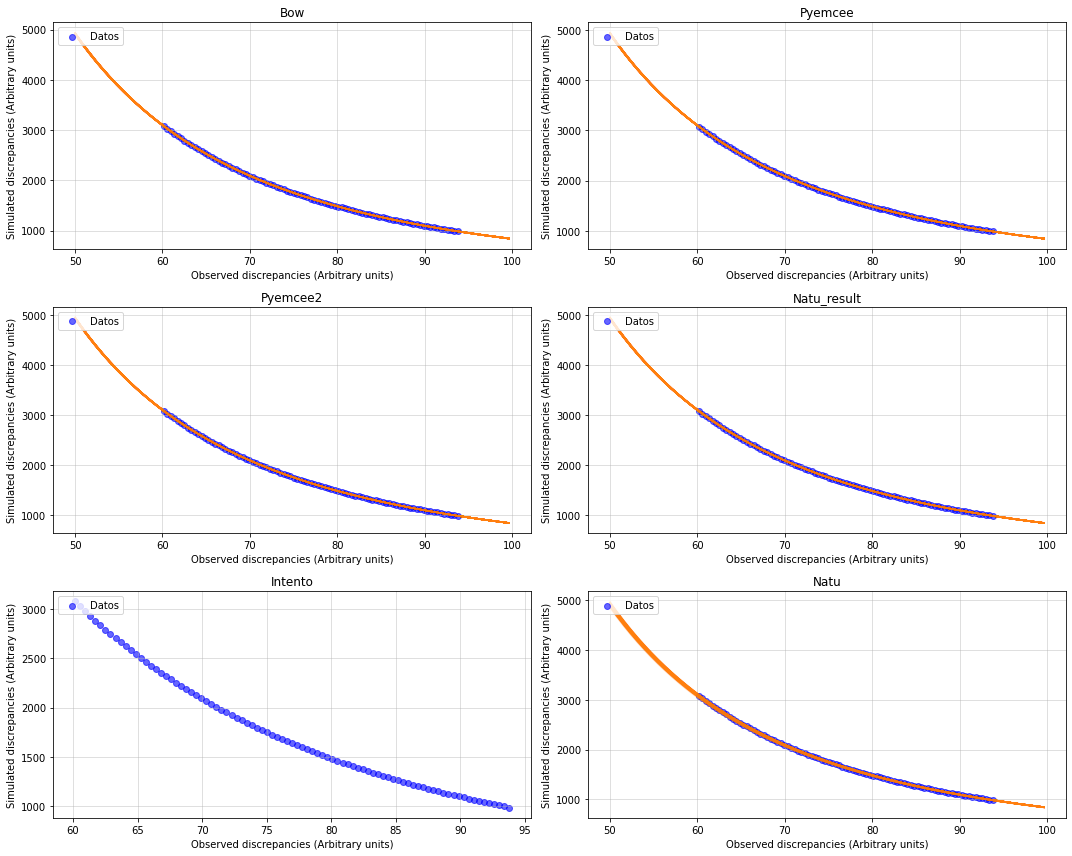

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(15, 12))
for ii, ax in enumerate(axes.flat, start=0):

  for i in range(int(len(rr[0,:,:])/100)):
    ax.plot(Dat[:,0],T_sky(Dat[:,0],*rr[ii,i,:]), "C1", alpha=0.1)
  ##Grafica la muetras con su respectivo error

  ax.scatter(x_C,y_C,alpha=0.6,color='b',label='Datos')
  ax.legend(loc='upper left',frameon=True)
  ax.set_xlabel('Observed discrepancies (Arbitrary units)')
  ax.set_ylabel('Simulated discrepancies (Arbitrary units)')
  ax.set_title(Cons_names[ii])
  ax.grid(alpha=0.5)
  fig.tight_layout()
plt.show()

# Gráficos de esquina

Estos graficos muestras coomo se relacionan los parametros esntre si, ademas sirve paa saber si las cadenas de los walkers a convergido.

In [ ]:
names=np.array(['a0','a1','a2','a3','a4','A','v0','w','tau'])
plt.figure()
for i in range(len(Cons)):

  print(Cons_names[i])
  corner.corner(rr[i],labels=names,quantiles=[0.16, 0.5, 0.84],truths=cc[i],show_titles=True)
  plt.title(Cons_names[i])
  plt.show()

# Es la siguiente tabla se ven los valores medios, obtenidos de los nwalkers.

In [ ]:

Tabla = """\
+-------------------------------------------------------------------------------------------------+
|Bow               Pyemcee        Pyemcee2         Intento        Natu_result     Natu            |
|-------------------------------------------------------------------------------------------------|
{}
+-------------------------------------------------------------------------------------------------+\
"""
Tabla = (Tabla.format('\n'.join("| {:<15} {:<15} {:<15} {:<15}{:<15} {:<15}  |".format(*fila)
 for fila in np.round(np.transpose(cc),3))))
print (Tabla)

+-------------------------------------------------------------------------------------------------+
|Bow               Pyemcee        Pyemcee2         Intento        Natu_result     Natu            |
|-------------------------------------------------------------------------------------------------|
| 3040.244        -11220.984      1744.545        -14290.167     4496661.122     1441.4           |
| 1071.353        -14168.634      148.011         -17634.261     -674111.872     -951.998         |
| 604.078         -10204.181      -688.553        -12279.992     -803305.181     627.022          |
| -33.672         144.732         37.195          156.448        -2734642.486    -76.585          |
| -1457.032       12659.066       -197.623        15716.373      3318625.87      228.216          |
| -32.744         0.491           1.736           0.289          2813017.746     379.627          |
| 148.213         77.927          78.532          83.593         9357446.067     14.488           |


#Discrepancia

Después de tener en muestreo de las función posterior, obtenidas con $\textit{pyemcee}$ y de verificar que los datos ajustan la señal de Tsky,  se prueba si el los datos sintéticos obtenidos mediante el modelo, discrepan de los datos observados.

En la siguiente función se usa el criterio de Tully Fischer para comparar los datos que obtuvimos de nuestro muestreo con los observados y hacer una gráfico de ellos y arrojar el valor del parámetro de discrepancia $p$

In [ ]:
def disc_sgg(ii,samples,x,y):
  #arreglos vacios para guardad los valores de la discrepancia simulada y observada
#ii=1

  discs=[]
  disco=[]

  rej=0 ## Tasa de rechazo
  samples=rr[ii,:,:]#parametros
  #yexp=(samples[i,0]*x+samples[i,3])**2+samples[i,1]**2
  #yexp=np.sqrt(yexp)
  #samples[:,0]
  n_100=len(samples)//10 # Candtidad de elementos a selecionar del nwalkers
  for i in range(n_100):
    # yexp es una arreglo que contiene
    #yexp=T_sky(x,samples[i,0],samples[i,1],samples[i,2],samples[i,3],samples[i,4],samples[i,5],samples[i,6],samples[i,7],samples[i,8] )
    yexp=T_sky(x,*samples[i])
    modpar=samples[np.random.randint(len(samples))] # Elige un conjunto de parametos de forma aleatoria de la muestra
    # Con los parametros del modelo, generamos datos sintéticos
    ymod=T_sky(x,*modpar) # Tsky modelo
    #ymod=np.sqrt(ymod)
    ysim=np.random.normal(ymod,abs(np.mean(0.05))) #Generando datos sinteticos
    if np.any(yexp<0)|np.any(ysim<0):
        rej+=1 # this checks if a negative ysim is generated
    else:
        discs+=[((np.sqrt(ysim)-np.sqrt(yexp))**2).sum()] # se guardan los valores de la discrepacia simulada (Freeman-Tukey)
        disco+=[((np.sqrt(y)-np.sqrt(yexp))**2).sum()] # Se guadan los valores de la discrepacia observada (Freeman-Tukey)
  print("Rejection rate =",100*rej//n_100,"%") #fraccion de veces que un número negativo fue generado
  if 100*rej//n_100 < 100:
      discs=np.array(discs)
      disco=np.array(disco)
      discs_[ii]=discs
      disco_[ii]=disco
      # make the discrepancy plot
      ax.scatter(disco,discs,color='darkblue',alpha=0.4,label=str(ii)+", Bayesian p-value:"+str(np.round((disco<discs).sum()*1./len(disco),2)))
      dmax=np.max(np.hstack((disco,discs)))
      dmin=np.min(np.hstack((disco,discs)))
      ppp=np.linspace(0,dmax+10,2)
      ax.plot(ppp,ppp,c='r')
      ax.set_xlim(dmin,dmax)
      ax.set_ylim(dmin,dmax)
      # the Bayesian "p-value" is the fraction of discrepancy realizations
      # when the observed discrepancy is lower than the simulated discrepancy
      # ideally this "p-value" should not be close to 0 or 1
      print("Bayesian p-value:", (disco<discs).sum()*1./len(disco))

In [ ]:
discs_=np.zeros((len(Cons),2250))
disco_=np.zeros((len(Cons),2250))
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(15, 12))
for ii, ax in enumerate(axes.flat, start=0):
#for ii in range(len(Cons)):
  disc_sgg(ii,rr,x,y)
  ax.legend(loc='upper left',frameon=True)
  ax.set_xlabel('Observed discrepancies (Arbitrary units)')
  ax.set_ylabel('Simulated discrepancies (Arbitrary units)')
  ax.set_title(Cons_names[ii])
  ax.grid()
fig.tight_layout()

plt.show()

Graficas

In [ ]:
for i in range(len(Cons)):
  fig, axs = plt.subplots(2, 2,figsize=(15, 12))
  fig.suptitle(Cons_names[i],fontsize=25)
  a0_,a1_,a2_,a3_,a4_,A1,v01,w1,tau1=cc[i]
  axs[0, 0].plot(x,T_sky(x,*cc[i]),color=Col[i], label='Ajuste')
  axs[0, 0].scatter(x_C,y_C,color='black',alpha=0.4,label='Datos')
  axs[0, 0].set_title(r'$T_{sky}$ [k] vs Frecuency [MHz] nwalkers')


  axs[0, 1].plot(x,T_21(x,A1,v01,w1,tau1),'k*',label='v,T21',color=Col[i])
  axs[0, 1].set_title(r'Modelo de $T_{21}$ vs Frecuency [MHz]')

  axs[1, 0].scatter(disco_[i],discs_[i],color='darkblue',alpha=0.4,label=str(i)+", Bayesian p-value:"+str(np.round((disco_[i]<discs_[i]).sum()*1./len(disco_[i]),2)))
  dmax=np.max(np.hstack((disco_[i],discs_[i])))
  dmin=np.min(np.hstack((disco_[i],discs_[i])))
  ppp=np.linspace(0,dmax+10,2)
  axs[1, 0].plot(ppp,ppp,c='r')
  axs[1, 0].set_title('Discrepancia modelada vs discrepancia observada')
  axs[1, 0].set_xlim(dmin,dmax)
  axs[1, 0].set_ylim(dmin,dmax)


  axs[1, 1].plot(x,(y-T_sky(x ,*cc[i])),'.',alpha=0.7,color=Col[i],label=str(Col[i]))
  axs[1, 1].set_title('Residuales')

  for ax in axs.flat:
      ax.set(xlabel='x-label', ylabel='y-label')

  # Hide x labels and tick labels for top plots and y ticks for right plots.
  for ax in axs.flat:
      ax.legend()
      ax.grid()

##Tiempo de autocorrelación

In [ ]:
# Estimate autocorrelation time of the MCMC sampling for the "best" model
plt.figure(figsize=(6,6))
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(15, 12))
for ii, ax in enumerate(axes.flat, start=0):
  print("Autocorrelation time for "+str(names))
  for j in range(9):
      autocorr=[]
      for i in range(500):
          autocorr.append(emcee.autocorr.integrated_time(rr[ii,:,j],c=5))
      autocorr=np.asarray(autocorr)
      ax.hist(autocorr,alpha=0.5,color=Col[j])
      print("Mean: ",autocorr.mean(),"Stdev: ",autocorr.std())
      ax.set_xlabel("tiempo de autocorrelación (steps)")
      ax.set_ylabel("Frequency")
      ax.grid()
      fig.tight_layout()
ax.legend(
          names,
          scatterpoints=1,
          loc='upper right',
          ncol=10,
          fontsize=11)

plt.show()

#Concluisones:
en los gráficos anteriores, se puede observar como los modelos logran reproducir fielmente la señal del cielo **Tsky**, pero muy pocos logran una distribución simular a la de la señal de $21$ cm, que es lo que se esta buscando, a pesar de esto, los modelos tienen un buen comportamiento desde el punto de vista de las discrepancias, ya que concuerdan los datos observados con los datos sintéticos, observación sobre el tiempo de correlación

#2 Modelo con proirs uniformes y sigma variable

El siguiente modelo, es el mismo que se hizo anteriormente, solo que ahora $\sigma$ el error ya no es constante, sino que es otro parámetro mas que se debe ajustar mediante emceee

In [ ]:
def T_sky_s(v,a0,a1,a2,a3,a4,A,v0,w,tau,sigma):
  T21= T_21(v,A,v0,w,tau)
  Tf= T_f(v,a0,a1,a2,a3,a4)
  return T21+Tf

#x=np.linspace(50,90,500)
#y=T_sky_s(x,*Cons[0])

In [ ]:
def T_modelo_s(x,y,yerr,const):
  a0,a1,a2,a3,a4,A,v0,w,tau,sigma= const             # intersección con el eje y
  nll=lambda *args: -log_likelihood_s(*args) # Construccion de la funcion lamda
  v=x
  #N=len(x)
  vc=78.0
  #Condiciones iniciales
  yerr=sigma
  In=np.array([a0,a1,a2,a3,a4,A,v0,w,tau,sigma]) + 0.1 * np.random.randn(10)
  #Solución
  Sol=minimize(nll,In,args=(x, y, yerr))
  # Extrayendo los valores de los parametros arojados por MlE
  popt = Sol.x
  a0_,a1_,a2_,a3_,a4_,A1,v01,w1,tau1,sigma1=popt

  return popt



def nwlakers_s(x,y,yerr,Sol,N,walkers,steps,i):
  pos = Sol+ 10e-1 * np.random.randn(walkers, N)  # posterior ,randn genera 9 arreglos de 1500 n umeros aleatorios
  nwalkers, ndim = pos.shape # 2500 caminos, 9 parametros

  sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability_s, args=(x, y, yerr,i))
  sampler.run_mcmc(pos, steps, progress=True);

  params=sampler.get_chain(discard=N, thin=1000, flat=True)#parametros

  #Time_autocorr(sampler,i,Ncons,steps)
  return params

def log_likelihood_s(theta,x,y,sigma):
  v=x
  a0,a1,a2,a3,a4,A,v0,w,tau,sigma = theta
  sn2=sigma**2 #+T_sky(v,a0,a1,a2,a3,a4,A,v0,w,tau)**2
  return -0.5*sum((y-T_sky(v,a0,a1,a2,a3,a4,A,v0,w,tau))**2/sn2 + np.log(2*np.pi*sn2))
def log_probability_s(theta, x, y, yerr,i):
    lp = log_p_s(theta,i,Cons_names)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood_s(theta, x, y, yerr)
def log_p_s (theta,i,Cons_names):
  a0,a1,a2,a3,a4,A,v0,w,tau,sigma = theta
  a0=np.round(a0,3)

  if Cons_names[i]== 'Bow':
    if 1500.0 < a0 < 1650.0 and 400.0 < a1 < 900.0 and  -1600.0< a2 <-600.0 and 450.0 <a3 < 950.0 and -225.0 < a4 < -100.0 and 0.370 < A <0.670 and  77.8< v0 <78.8 and 19.5 <w < 22.0 and 4.5 <tau< 13.0 and -5.0 <sigma< 5.0:
    #if 1.400 < a0 < 1.650 and 0.400 < a1 < 0.900 and  -0.1600< a2 <-0.600 and 0.450 <a3 < 0.950 and -0.225 < a4 < -0.100 and 0.370< A < 0.670 and 77.4  < v0 < 78.5 and 17.0  < w < 22.8 and 6.0<tau<7.8 and 0.0 <sigma< 0.6:
      return 0.0
  if Cons_names[i]=='Pyemcee':
    if -18000.0 < a0 < -10000.0 and -1800.0 < a1 < -16000.0 and  -1000.0< a2 <-7500.0 and 100.0 <a3 < 150.0 and 800.0 < a4 < 16000.0 and 0.09 < A < 1.30 and  77.8< v0 <78.8 and 17.5 <w < 22.0 and 2.5 <tau< 14.8 and -5.0 <sigma< 5.0:
      return 0.0
  if Cons_names[i]=='Pyemcee2':
    if 1400 < a0 < 1650 and 400.0 < a1 < 900.0 and  -1600< a2 <-600 and 450.0 <a3 < 950.0 and -225.0 < a4 < -100.0 and 370.0< A < 670.0 and 77.4  < v0 < 78.5 and 17.0  < w < 22.8 and 6.0<tau<7.8 and -5.0 <sigma< 5.0:
      return 0.0
  if Cons_names[i]=='Natu_result':
    if -2000 < a0 < 2000.0 and -2000.0 < a1 < 2000.0 and  -2000.0< a2 <2000.0 and -2000.0 <a3 < 2000.0 and -2000 < a4 < 2000.0 and 0.90 < A < 1.30 and  77.8< v0 <78.8 and 19.5 <w < 22.0 and 2.5 <tau< 4.8 and -5.0 <sigma< 5.0 : #intervalos expandidos
      print('ok')
      return 0.0
  if Cons_names[i]=='Intento':
    if -20000 < a0 < 20000.0 and -20000.0 < a1 < 20000.0 and  -20000.0< a2 <20000.0 and -20000.0 <a3 < 20000.0 and -20000 < a4 < 20000.0 and 0.0 < A < 1.30 and  77.8< v0 <78.8 and 17.5 <w < 22.0 and 2.5 <tau< 14.8 and -5.0 <sigma< 5.0: #intervalos expandidos
        print('ok')
        return 0.0
  if  Cons_names[i]=='Natu':
    if 1980.0 < a0 < 2030.0 and -800.0 < a1 < -200.0 and  -200.0< a2 <1060.0 and -800.0 <a3 < 1800.0 and 150.0 < a4 < 210.0 and 0.0 < A < 1.30 and  77.8< v0 <78.8 and 17.5 <w < 22.0 and 2.0 <tau< 14.8 and -5.0 <sigma< 5.0:  #O Artículo
      return 0.0
  return -np.inf
#if (a0-1000.0) < a0 < (a0+1000.0) and (a1-400.0) < a1 < (a1+400.0) and  (a2-100.0)< a2 <(a2 +100.0) and (a3-450.0) <a3 < (a3+450.0) and (a4 -500.0) < a4 < (a4 +500.0) and (A-0.5) < A <(A+ 0.67) and (v0-2.4)  < v0 <(v0 + 2.5) and (w-20.0)  < w <(w+ 22.8 )and (tau-6.0)<tau<(tau+7.8):

In [ ]:
steps=10000 #pasos
N= (len(Cons[0])) #-1 # número de constantes (en este caso esta el menos 1 ya que los arreglos tienen el parametro sigma )

cc_s=np.zeros((len(Cons),N))  # Este arreglo vacio, va a contener los valores principales de los parametros
rr_s=np.zeros((len(Cons),22500,N)) #Este arreglo vacio va a contener los n walkers  de los parametross
for i in range(len(Cons)):
  Sol=T_modelo_s(x_C,y_C,yerr,Cons[i])
  params=nwlakers_s(x_C,y_C,0.5,Sol,N,2500,steps,i)
  popt2=np.array(params.mean(axis=0))
  a0_,a1_,a2_,a3_,a4_,A1,v01,w1,tau1,sigma1=popt2
  rr_s[i]=params
  cc_s[i]=(popt2 )


In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(15, 12))
for ii, ax in enumerate(axes.flat, start=0):

  for i in range(int(len(rr_s[0,:,:])/100)):
    ax.plot(Dat[:,0],T_sky_s(Dat[:,0],*rr_s[ii,i,:]), "C1", alpha=0.1)
  ##Grafica la muetras con su respectivo error

  ax.scatter(x_C,y_C,alpha=0.6,color='b',label='Datos')
  ax.legend(loc='upper left',frameon=True)
  ax.set_xlabel('Observed discrepancies (Arbitrary units)')
  ax.set_ylabel('Simulated discrepancies (Arbitrary units)')
  ax.set_title(Cons_names[ii])
  ax.grid(alpha=0.5)
  fig.tight_layout()
plt.show()

In [ ]:
names_s=np.array(['a0','a1','a2','a3','a4','A','v0','w','tau','sigma'])
plt.figure()
for i in range(len(Cons)):

  print(Cons_names[i])
  corner.corner(rr_s[i],labels=names_s,quantiles=[0.16, 0.5, 0.84],truths=cc_s[i],show_titles=True)
  plt.title(Cons_names[i])
  plt.show()

In [ ]:
for i in range (len(Cons)):
  np.savetxt('Corner_emcee'+str(i)+'.txt', rr[i], delimiter=' ')#, newline='\n', header='', footer='', comments='# ', encoding=None)
  np.savetxt('Corner_emcee_s'+str(i)+'.txt', rr_s[i], delimiter=' ')#, newline='\n', header='', footer='', comments='# ', encoding=None)

In [ ]:
def disc_sgg(ii,samples,x,y):
  #arreglos vacios para guardad los valores de la discrepancia simulada y observada
  discs=[]
  disco=[]

  rej=0 ## Tasa de rechazo
  samples=rr_s[ii,:,:]#parametros
  #yexp=(samples[i,0]*x+samples[i,3])**2+samples[i,1]**2
  #yexp=np.sqrt(yexp)
  #samples[:,0]
  n_100=len(samples)//10 # Candtidad de elementos a selecionar del nwalkers
  for i in range(n_100):
    # yexp es una arreglo que contiene
    #yexp=T_sky(x,samples[i,0],samples[i,1],samples[i,2],samples[i,3],samples[i,4],samples[i,5],samples[i,6],samples[i,7],samples[i,8] )
    yexp=(T_sky_s(x,*samples[i]))
    modpar=samples[np.random.randint(len(samples))] # Elige un conjunto de parametos de forma aleatoria de la muestra
    # Con los parametros del modelo, generamos datos sintéticos
    ymod=T_sky_s(x,*modpar) # Tsky modelo
    #ymod=np.sqrt(ymod)
    ysim=np.random.normal(ymod,abs(np.mean(rr_s[ii,:,9]))) #Generando datos sinteticos
    if np.any(yexp<0)|np.any(ysim<0):
        rej+=1 # this checks if a negative ysim is generated
    else:
        discs+=[((np.sqrt(ysim)-np.sqrt(yexp))**2).sum()] # se guardan los valores de la discrepacia simulada (Freeman-Tukey)
        disco+=[((np.sqrt(y)-np.sqrt(yexp))**2).sum()] # Se guadan los valores de la discrepacia observada (Freeman-Tukey)
  print("Rejection rate =",100*rej//n_100,"%") #fraccion de veces que un número negativo fue generado
  if 100*rej//n_100 < 100:
      discs=np.array(discs)
      disco=np.array(disco)
      discs_s[ii]=discs
      disco_s[ii]=disco
      # make the discrepancy plot
      ax.scatter(disco,discs,color='darkblue',alpha=0.4,label=str(ii)+", Bayesian p-value:"+str(np.round((disco<discs).sum()*1./len(disco),2)))
      dmax=np.max(np.hstack((disco,discs)))
      dmin=np.min(np.hstack((disco,discs)))
      ppp=np.linspace(0,dmax+10,2)
      ax.plot(ppp,ppp,c='r')
      ax.set_xlim(dmin,dmax)
      ax.set_ylim(dmin,dmax)
      # the Bayesian "p-value" is the fraction of discrepancy realizations
      # when the observed discrepancy is lower than the simulated discrepancy
      # ideally this "p-value" should not be close to 0 or 1
      print("Bayesian p-value:", (disco<discs).sum()*1./len(disco))

In [ ]:
discs_s=np.zeros((len(Cons),2250))
disco_s=np.zeros((len(Cons),2250))
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(15, 12))
for ii, ax in enumerate(axes.flat, start=0):
#for ii in range(len(Cons)):
  disc_sgg(ii,rr_s,x,y)
  ax.legend(loc='upper left',frameon=True)
  ax.set_xlabel('Observed discrepancies (Arbitrary units)')
  ax.set_ylabel('Simulated discrepancies (Arbitrary units)')
  ax.set_title(Cons_names[ii])
  ax.grid()
fig.tight_layout()

plt.show()

Graficas

In [ ]:
for i in range(len(Cons)):
  fig, axs = plt.subplots(2, 2,figsize=(15, 12))
  fig.suptitle(Cons_names[i],fontsize=25)
  a0_,a1_,a2_,a3_,a4_,A1,v01,w1,tau1,sigma1=cc_s[i]
  axs[0, 0].plot(x,T_sky_s(x,*cc_s[i]),color=Col[i], label='Ajuste')
  axs[0, 0].scatter(x_C,y_C,color='black',alpha=0.4,label='Datos')
  axs[0, 0].set_title(r'$T_{sky}$ [k] vs Frecuency [MHz] nwalkers')


  axs[0, 1].plot(x,T_21(x,A1,v01,w1,tau1),'k*',label='v,T21',color=Col[i])
  axs[0, 1].set_title(r'Modelo de $T_{21}$ vs Frecuency [MHz]')

  axs[1, 0].scatter(disco_s[i],discs_s[i],color='darkblue',alpha=0.4,label=str(i)+", Bayesian p-value:"+str(np.round((disco_s[i]<discs_s[i]).sum()*1./len(disco_s[i]),2)))
  dmax=np.max(np.hstack((disco_s[i],discs_s[i])))
  dmin=np.min(np.hstack((disco_s[i],discs_s[i])))
  ppp=np.linspace(0,dmax+10,2)
  axs[1, 0].plot(ppp,ppp,c='r')
  axs[1, 0].set_title('Discrepancia modelada vs discrepancia observada')
  axs[1, 0].set_xlim(dmin,dmax)
  axs[1, 0].set_ylim(dmin,dmax)


  axs[1, 1].plot(x,(y-T_sky_s(x,*cc_s[i])),'.',alpha=0.7,color=Col[i],label=str(Col[i]))
  axs[1, 1].set_title('Residuales')

  for ax in axs.flat:
      ax.set(xlabel='x-label', ylabel='y-label')

  # Hide x labels and tick labels for top plots and y ticks for right plots.
  for ax in axs.flat:
      ax.legend()
      ax.grid()

##Tiempo de autocorrelación

In [ ]:
# Estimate autocorrelation time of the MCMC sampling for the "best" model
plt.figure(figsize=(6,6))
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(15, 12))
for ii, ax in enumerate(axes.flat, start=0):
  print("Autocorrelation time for "+str(names))
  for j in range(9):
      autocorr=[]
      for i in range(500):
          autocorr.append(emcee.autocorr.integrated_time(rr_s[ii,:,j],c=5))
      autocorr=np.asarray(autocorr)
      ax.hist(autocorr,alpha=0.5,color=Col[j])
      print("Mean: ",autocorr.mean(),"Stdev: ",autocorr.std())
      ax.set_xlabel("tiempo de autocorrelación (steps)")
      ax.set_ylabel("Frequency")
      ax.grid()
      fig.tight_layout()
ax.legend(
          names,
          scatterpoints=1,
          loc='upper right',
          ncol=10,
          fontsize=11)

plt.show()

In [ ]:
x,y=Dat[:,0][Dat[:,2]>0],Dat[:,2][Dat[:,2]>0] # Variables
#yerr=0.005
plt.figure(figsize=(10,7))
for i in range(len(Cons)):
  Const=Cons[i]
  plt.plot(x,T_sky(x,*Const[0:9]), color=Col[i] ,label=Cons_names[i])
#  plt.plot(x,T_sky(x,*Sol), color='darkred' )
plt.scatter(x,y,marker='.',color='blue',label='Dat')
plt.xlabel('Frecuencia [MHz]')
plt.ylabel('TEmperatura [k]')
plt.ylim(0,10000)
plt.legend()
plt.grid()

In [ ]:

Tabla = """\
+-------------------------------------------------------------------------------------------------+
|Bow               Pyemcee        Pyemcee2         Intento        Natu_result     Natu            |
|-------------------------------------------------------------------------------------------------|
{}
+-------------------------------------------------------------------------------------------------+\
"""
Tabla = (Tabla.format('\n'.join("| {:<15} {:<15} {:<15} {:<15}{:<15} {:<15}  |".format(*fila)
 for fila in np.round(np.transpose(cc_g),3))))
print (Tabla)

In [ ]:

Tabla = """\
+-------------------------------------------------------------------------------------------------+
|Bow               Pyemcee        Pyemcee2         Intento        Natu_result     Natu            |
|-------------------------------------------------------------------------------------------------|
{}
+-------------------------------------------------------------------------------------------------+\
"""
Tabla = (Tabla.format('\n'.join("| {:<15} {:<15} {:<15} {:<15}{:<15} {:<15}  |".format(*fila)
 for fila in np.round(np.transpose(cc_g1),3))))
print (Tabla)

In [ ]:

Tabla = """\
+-------------------------------------------------------------------------------------------------+
|Bow               Pyemcee        Pyemcee2         Intento        Natu_result     Natu            |
|-------------------------------------------------------------------------------------------------|
{}
+-------------------------------------------------------------------------------------------------+\
"""
Tabla = (Tabla.format('\n'.join("| {:<15} {:<15} {:<15} {:<15}{:<15} {:<15}  |".format(*fila)
 for fila in np.round(np.transpose(cc_g2),3))))
print (Tabla)

In [ ]:

Tabla = """\
+-------------------------------------------------------------------------------------------------+
|Bow               Pyemcee        Pyemcee2         Intento        Natu_result     Natu            |
|-------------------------------------------------------------------------------------------------|
{}
+-------------------------------------------------------------------------------------------------+\
"""
Tabla = (Tabla.format('\n'.join("| {:<15} {:<15} {:<15} {:<15}{:<15} {:<15}  |".format(*fila)
 for fila in np.round(np.transpose(cc_g3),3))))
print (Tabla)